We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [13]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-11 12:25:54--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.198.54, 13.227.198.98, 13.227.198.83, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.198.54|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [14]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [15]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-04,4,5,2020,235,13,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-03,3,5,2020,134,4,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-02,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia


In [16]:
df[df['geoId'] == 'AI']['popData2018'].iloc[0]

nan

To make room in the dataframe for future predictions and smoothed input data, we add columns for those values and set them to missing for now.

In [17]:
df['pcases']  = np.nan
df['scases']  = np.nan
df['pdeaths'] = np.nan
df['sdeaths'] = np.nan

Last check of our source dataframe.

In [18]:
df.count()

dateRep                    16322
day                        16322
month                      16322
year                       16322
cases                      16322
deaths                     16322
countriesAndTerritories    16322
geoId                      16322
countryterritoryCode       16182
popData2018                16131
continentExp               16322
pcases                         0
scases                         0
pdeaths                        0
sdeaths                        0
dtype: int64

We pivot to a country by column format.

In [19]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-07   0.0  546.0  168.0  0.0  0.0  12.0  163.0  0.0  188.0  65.0  ...   
2020-05-08   1.0  502.0  171.0  0.0  0.0  10.0  102.0  0.0  163.0  22.0  ...   
2020-05-09   0.0  553.0  215.0  0.0  0.0   8.0  145.0  7.0  240.0  62.0  ...   
2020-05-10   2.0  624.0  255.0  0.0  0.0   6.0  146.0  0.0  165.0  42.0  ...   
2020-05-11   1.0  781.0  369.0  0.0  0.0  12.0  138.0  2.0   13.0  10.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-07     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-08     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-09     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-10     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-11     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[133 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add 100 days and check our latest date.

In [20]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('100 days'))
df_geo = df_geo.reindex(new_index)
df_geo.describe()

cases                                                           \
geoId         AD          AE          AF         AG         AI         AL   
count  59.000000  127.000000  123.000000  53.000000  46.000000  64.000000   
mean   12.796610  143.291339   35.788618   0.471698   0.065217  13.562500   
std    12.783043  220.891847   69.774608   1.202622   0.326747   7.953985   
min     0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
25%     1.000000    0.000000    0.000000   0.000000   0.000000   7.750000   
50%     9.000000    1.000000    0.000000   0.000000   0.000000  12.000000   
75%    20.500000  345.500000   37.500000   0.000000   0.000000  18.250000   
max    43.000000  781.000000  369.000000   6.000000   2.000000  34.000000   

                                                       ... pdeaths            \
geoId          AM         AO          AR           AT  ...      VC   VE   VG   
count  124.000000  51.000000   66.000000   133.000000  ...     0.0  0.0  0.0   
mean    26.717742   0.882353   87.515152   118.699248  ...     NaN  NaN  NaN   
std     39.668660   1.595582   71.947896   213.324976  ...     NaN  NaN  NaN   
min      0.000000   0.000000    0.000000     0.000000  ...     NaN  NaN  NaN   
25%      0.000000   0.000000   13.250000     0.000000  ...     NaN  NaN  NaN   
50%      0.000000   0.000000   87.000000     6.000000  ...     NaN  NaN  NaN   
75%     46.250000   1.000000  140.500000   130.000000  ...     NaN  NaN  NaN   
max    163.000000   7.000000  344.000000  1141.000000  ...     NaN  NaN  NaN   

                                          
geoId   VI   VN   XK   YE   ZA   ZM   ZW  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[8 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [21]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    233.000000
mean     480.000000
std       67.405489
min      364.000000
25%      422.000000
50%      480.000000
75%      538.000000
max      596.000000
Name: daynum, dtype: float64

For each country we create a simple dataframe to contain the source values for our fitting algorithm. We take the `mean` of two  days to smooth out frequent reporting delays. To ignore the noise of early cases before the outbreak we select only those days where the number is above 1 in 100.000 of the population and take the logarithm.

In [22]:
# Suppress warnings on memory usage of multiple plots

import matplotlib as mpl
mpl.rc('figure', max_open_warning=0)

RU factors [-6.39259357e-04  6.41236857e-01 -1.56746612e+02] residuals 0.0750856408410148
US factors [-6.83937136e-04  6.51273387e-01 -1.50502127e+02] residuals 0.4781640163036408
BR factors [ 2.71545172e-04 -2.35951952e-01  5.42547887e+01] residuals 0.11717912927397445
AT factors [-2.36868636e-03  2.15141454e+00 -4.85739660e+02] residuals 0.5327214826479835
CH factors [-1.16149164e-03  1.06309713e+00 -2.40335078e+02] residuals 1.2684544080291196
DE factors [-7.01396449e-04  6.46874391e-01 -1.45536776e+02] residuals 1.2775000773634932
IT factors [-6.20314392e-04  5.71450958e-01 -1.27923948e+02] residuals 0.7652493240583871
ES factors [-1.04840979e-03  9.69861521e-01 -2.20533242e+02] residuals 2.2096408091903643
FR factors [-7.87458921e-04  7.29835486e-01 -1.65585382e+02] residuals 1.6541346391074474
SE factors [-3.68125144e-04  3.54725633e-01 -8.26781112e+01] residuals 0.5931670072209932
UK factors [-7.40175467e-04  7.07643938e-01 -1.65361861e+02] residuals 0.4553853617683262
IE factor

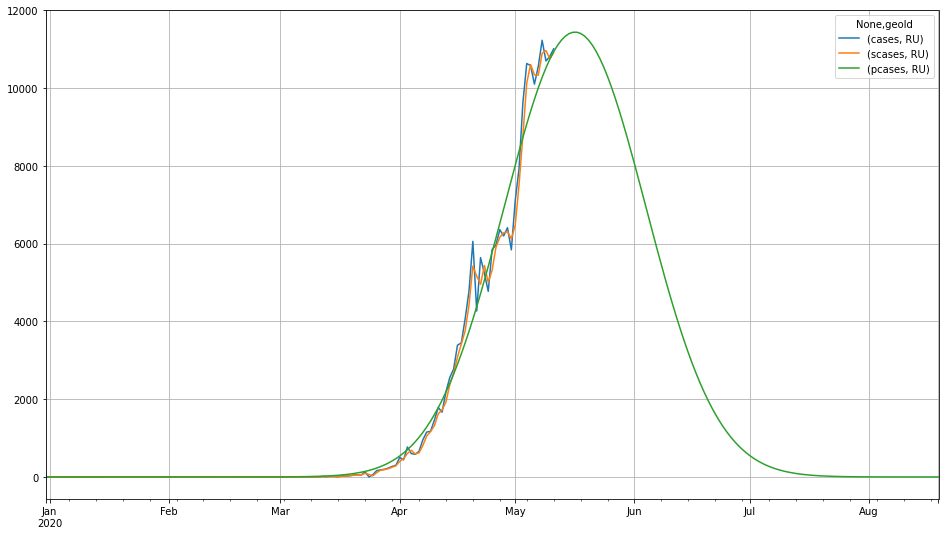

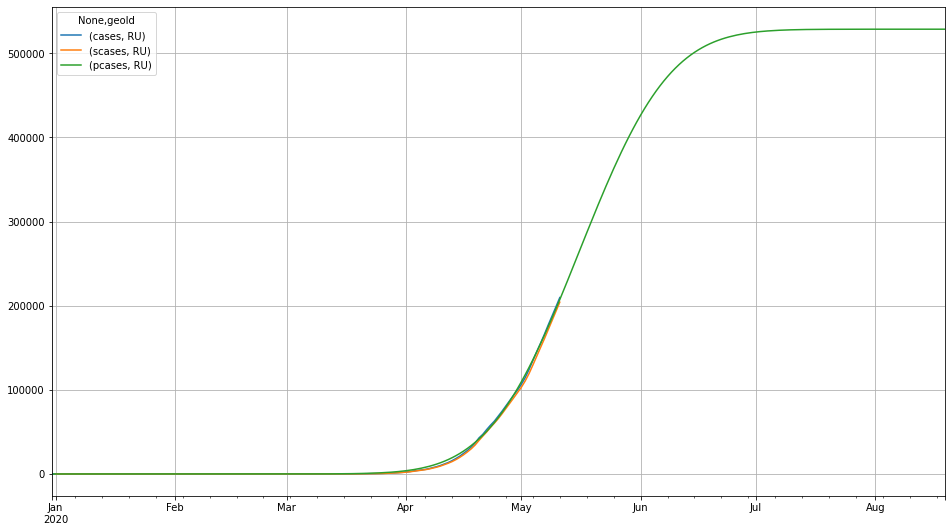

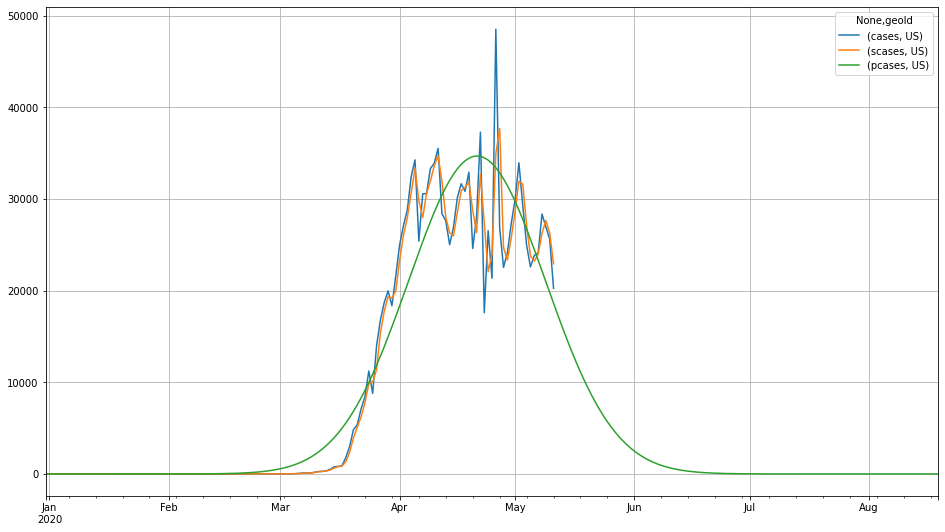

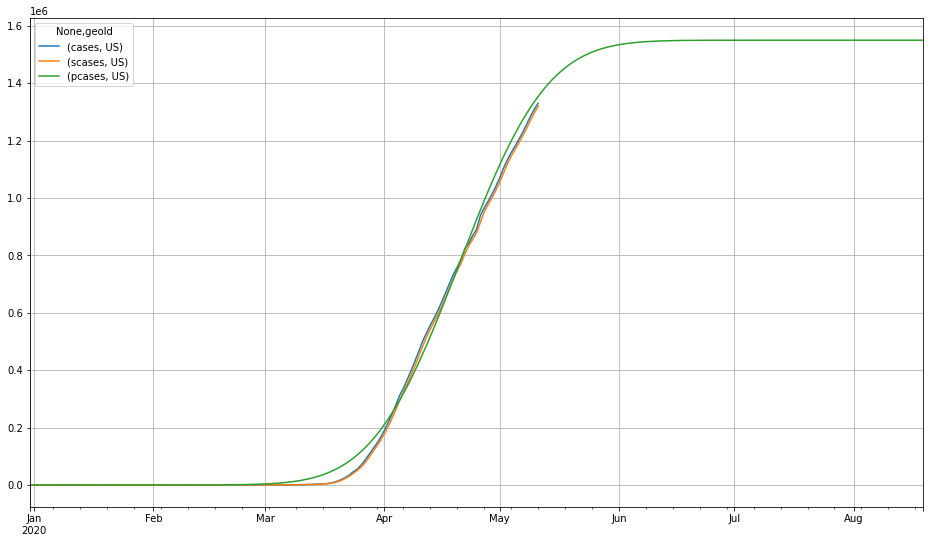

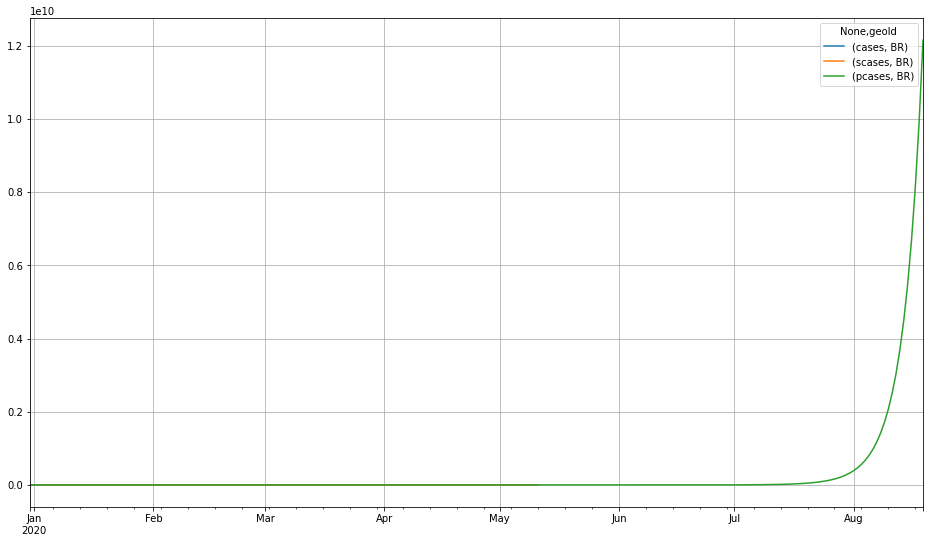

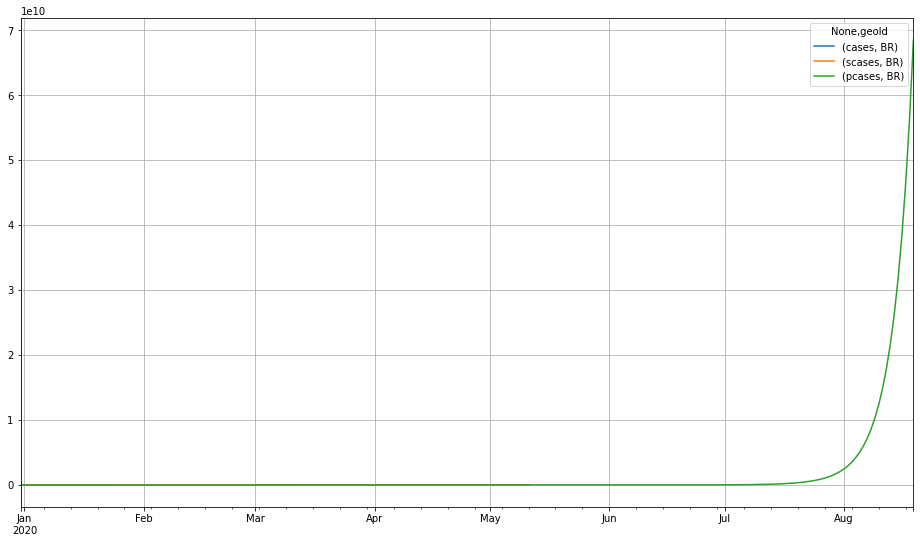

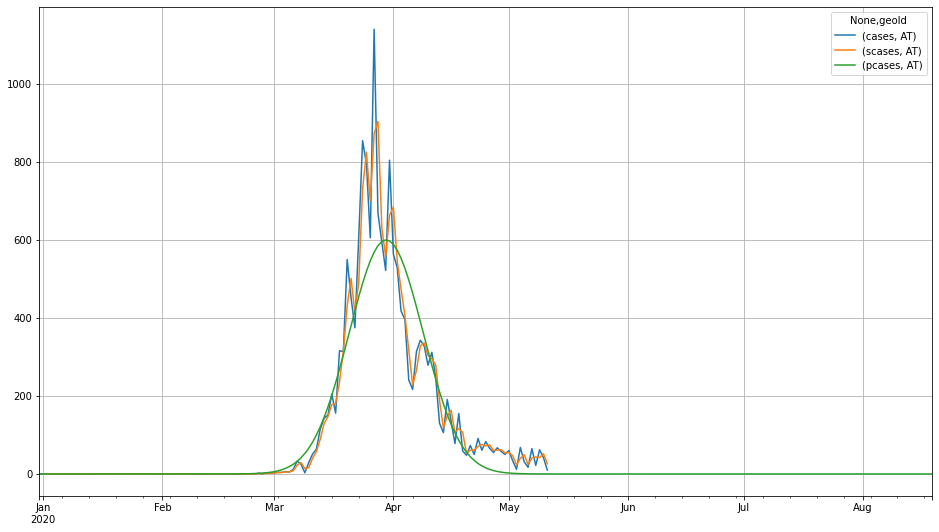

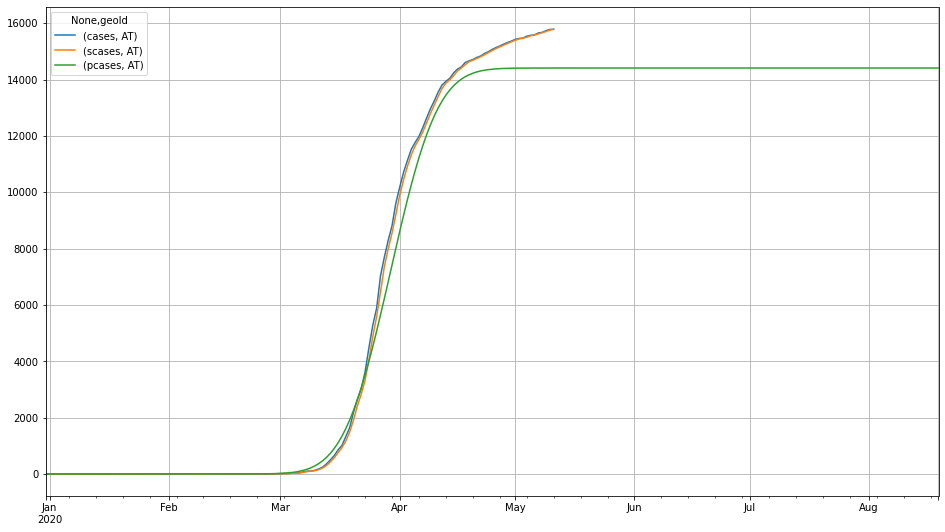

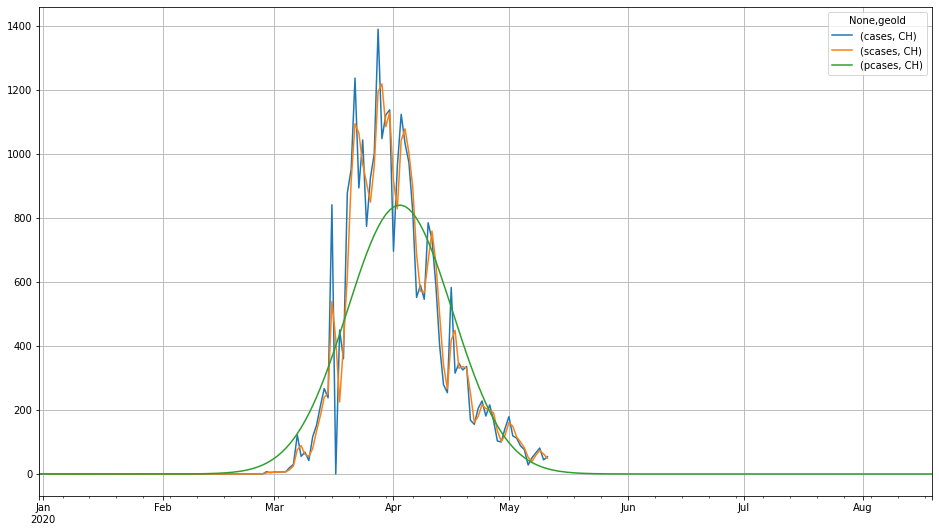

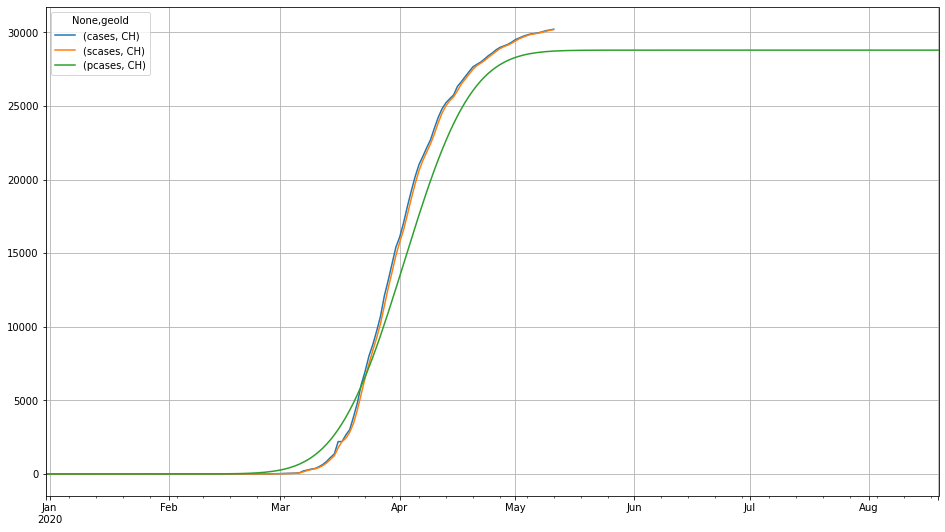

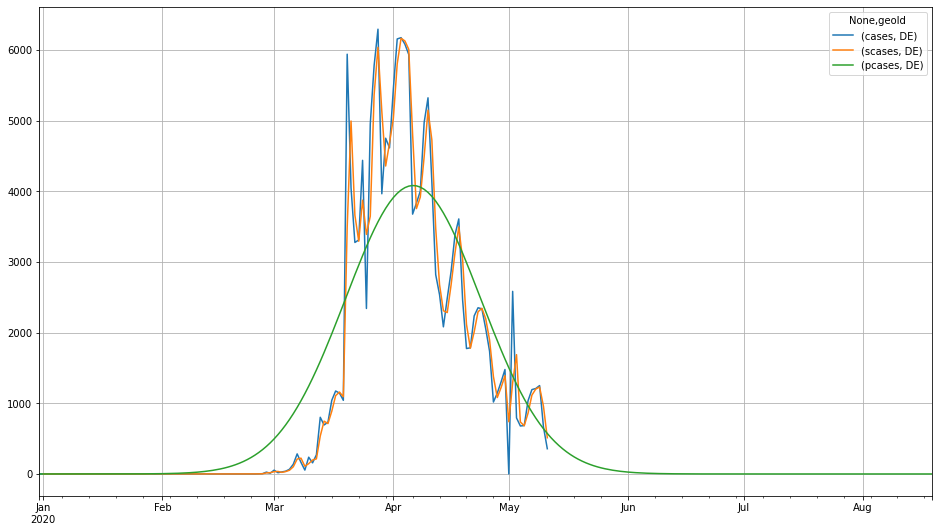

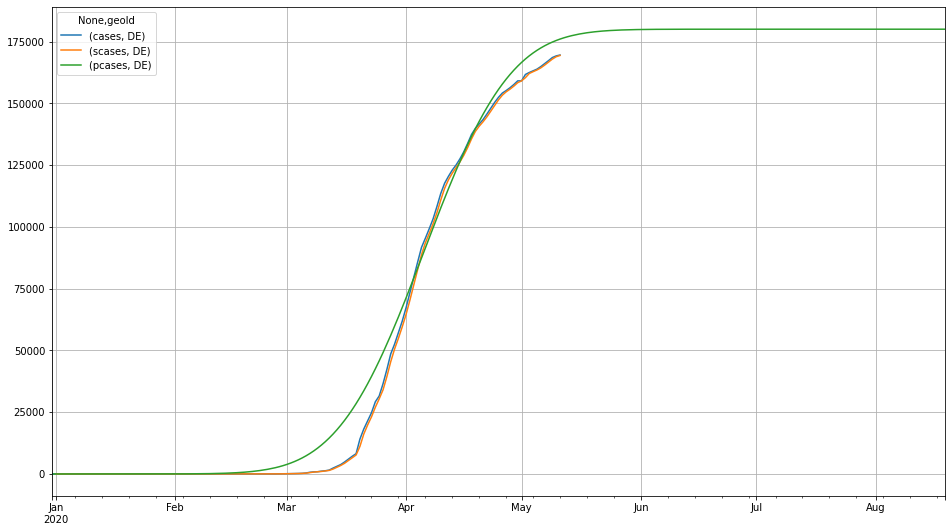

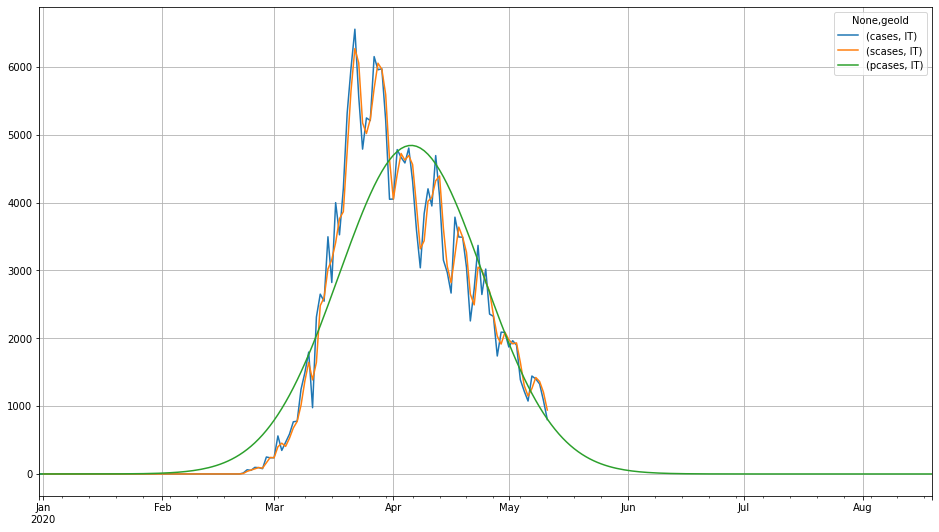

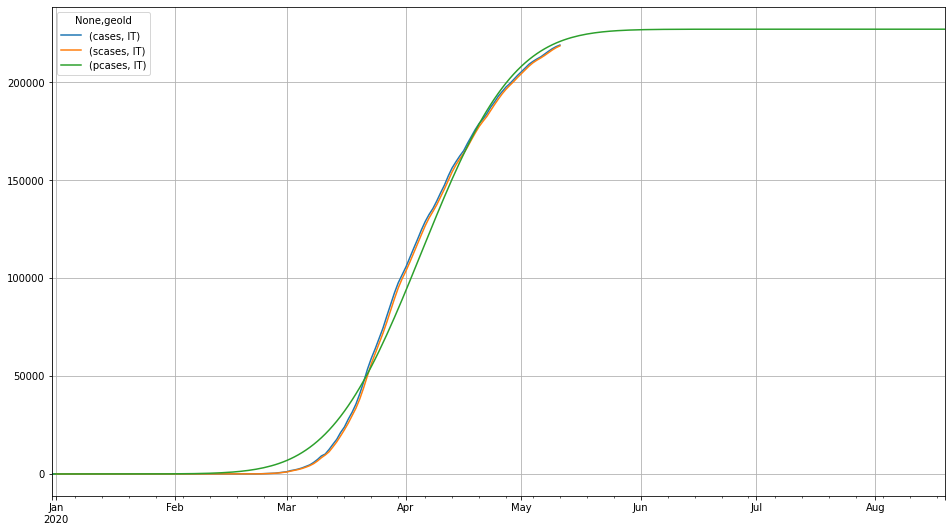

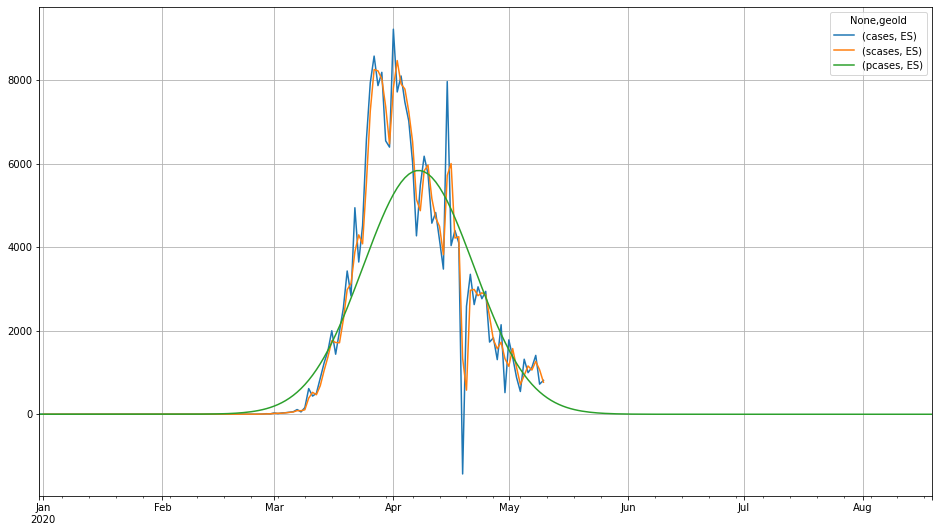

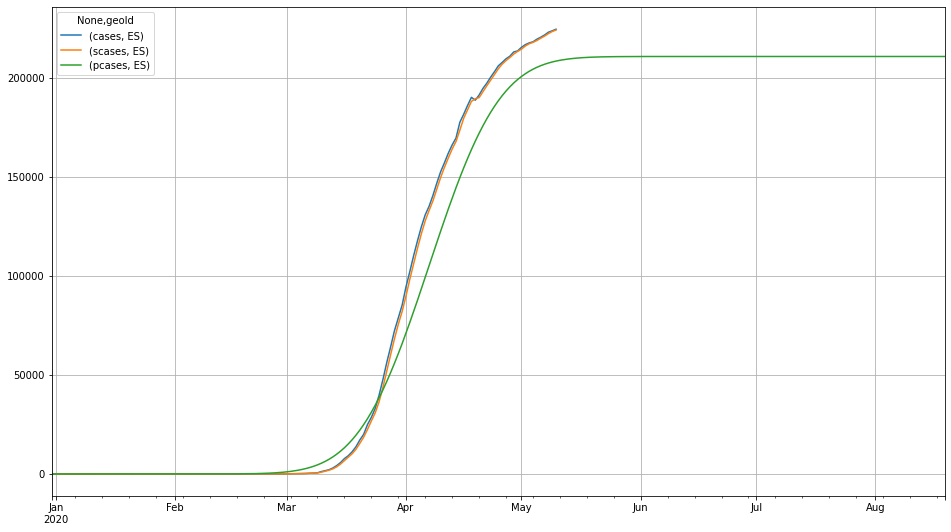

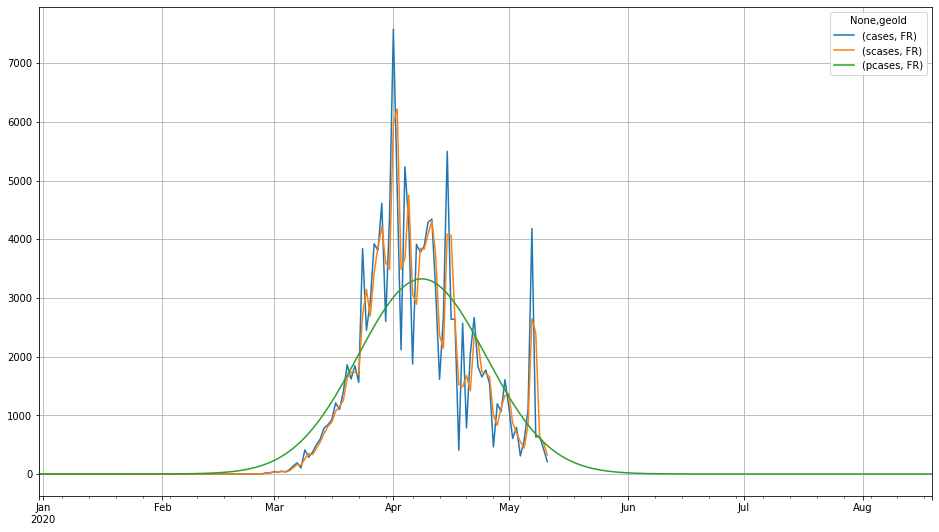

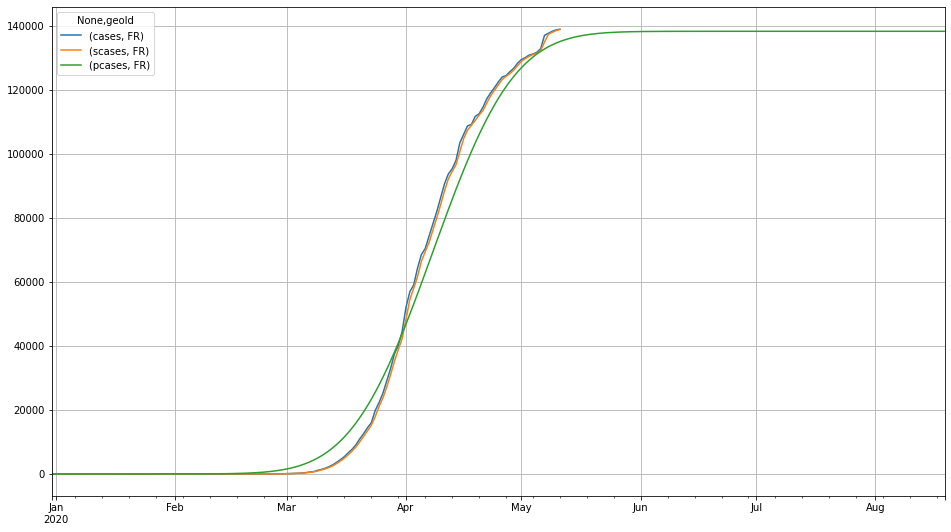

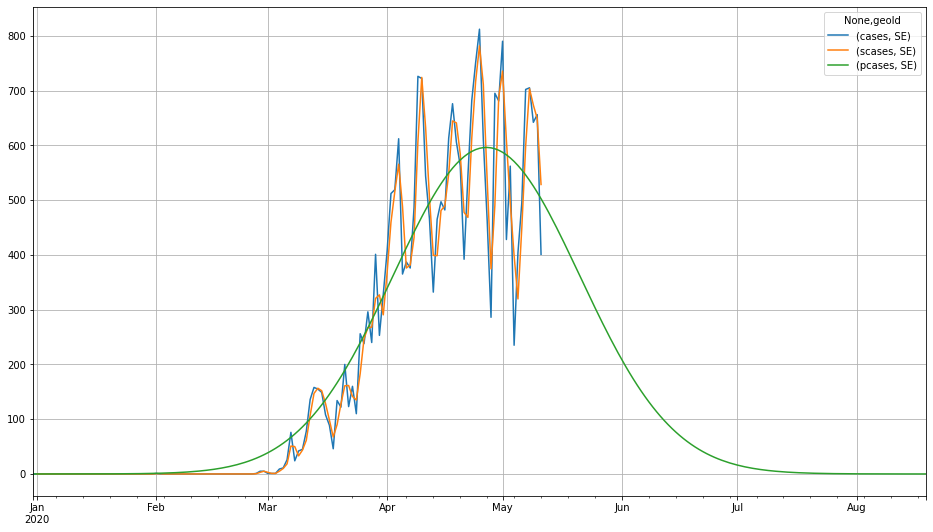

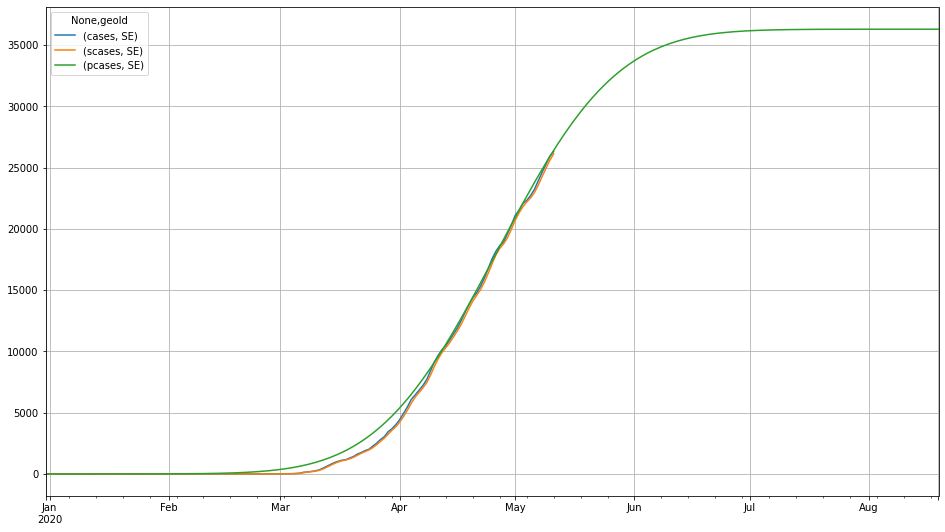

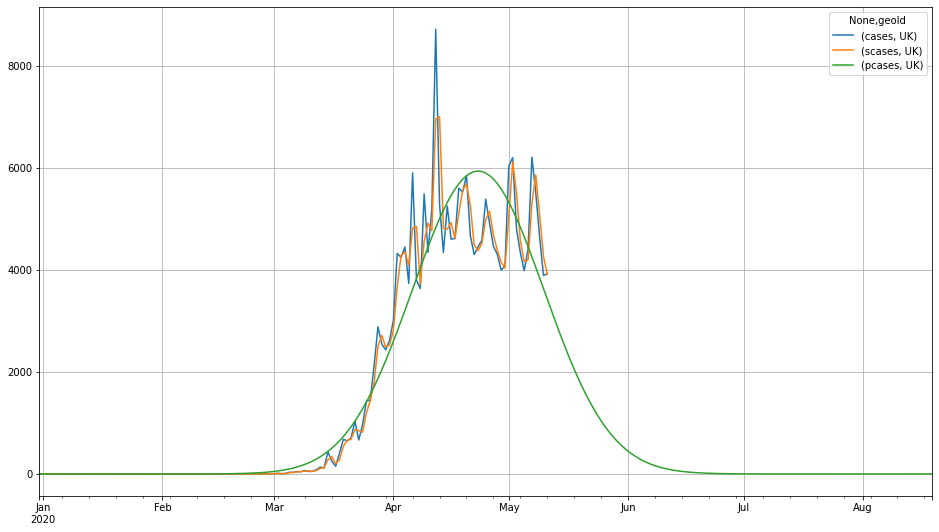

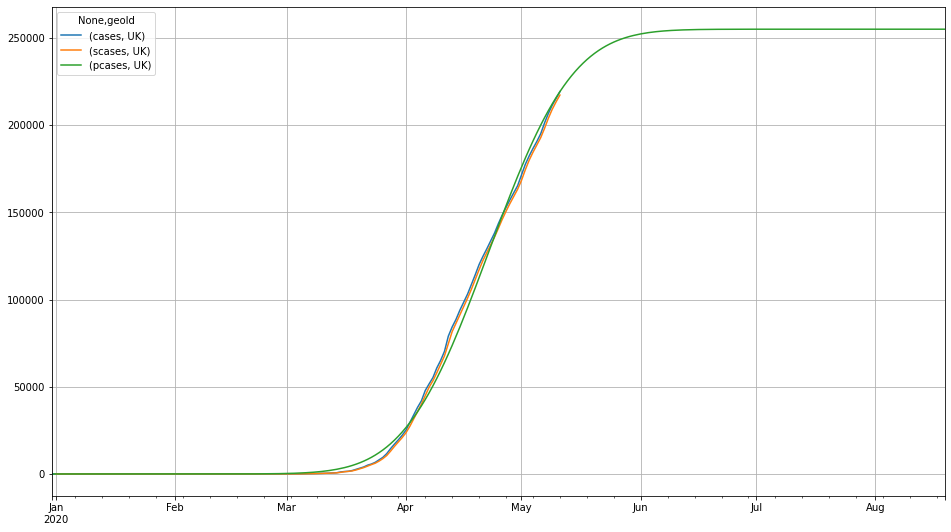

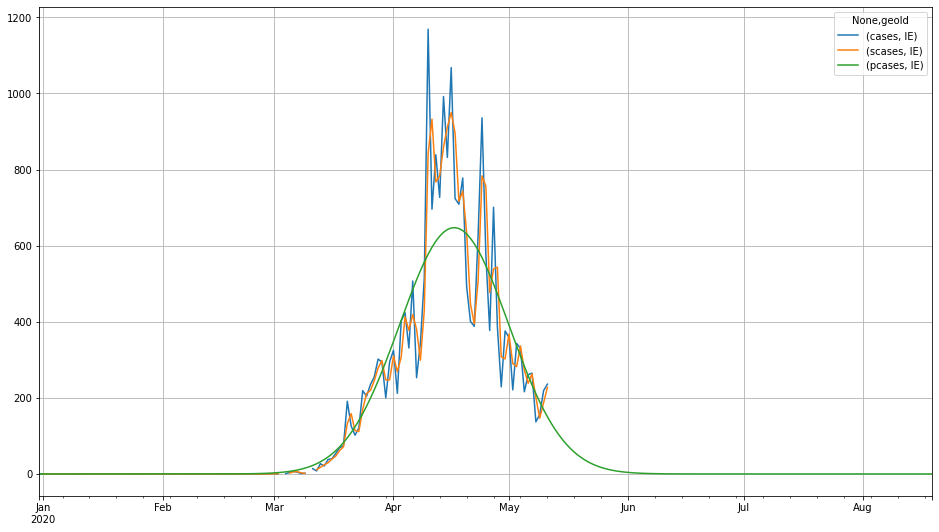

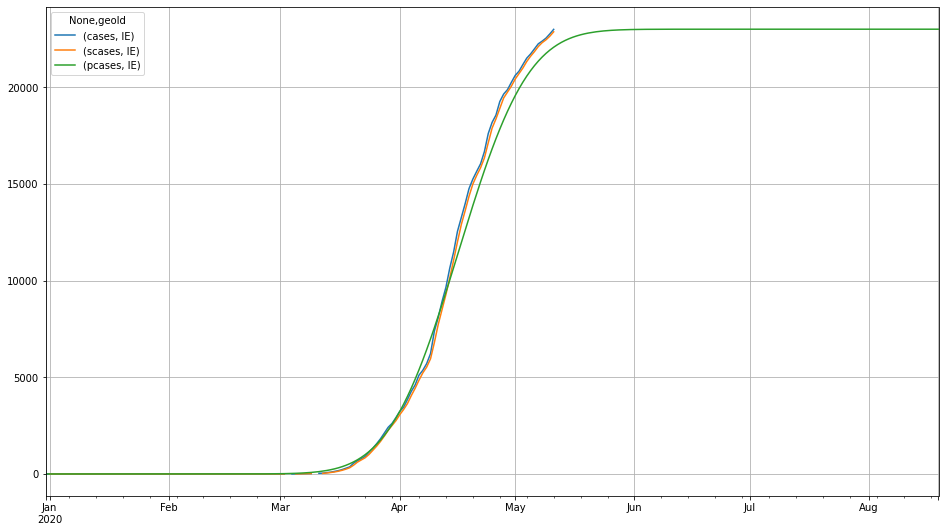

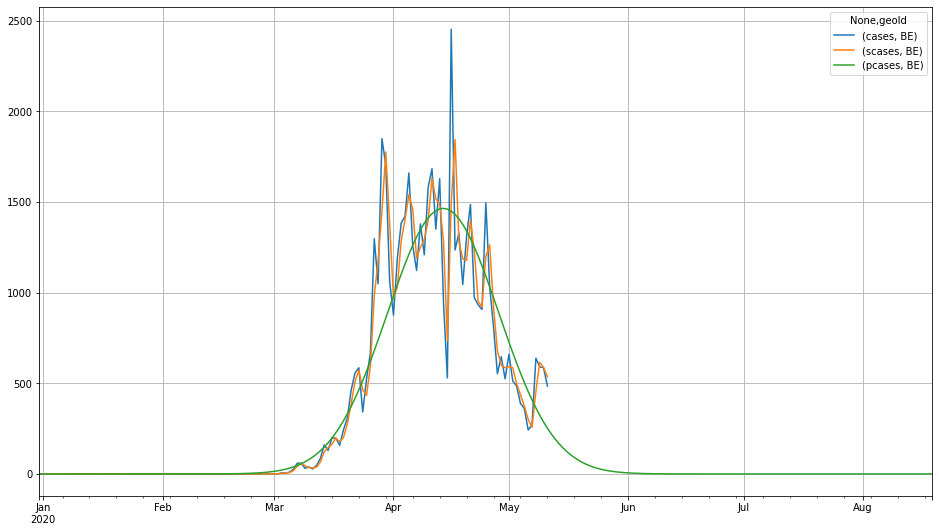

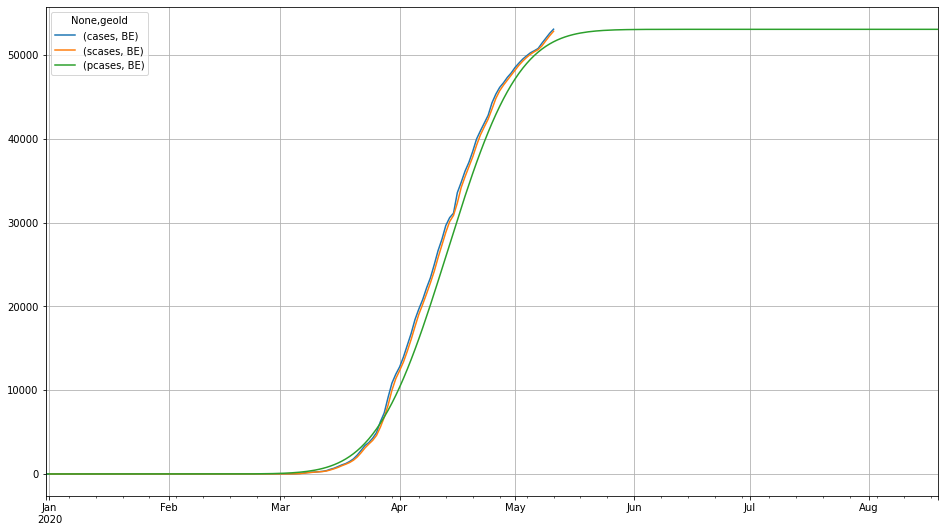

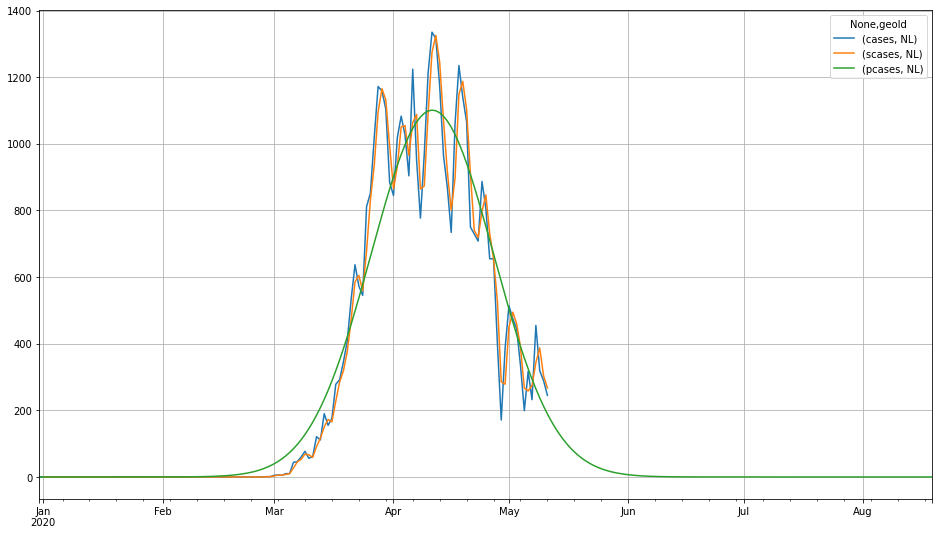

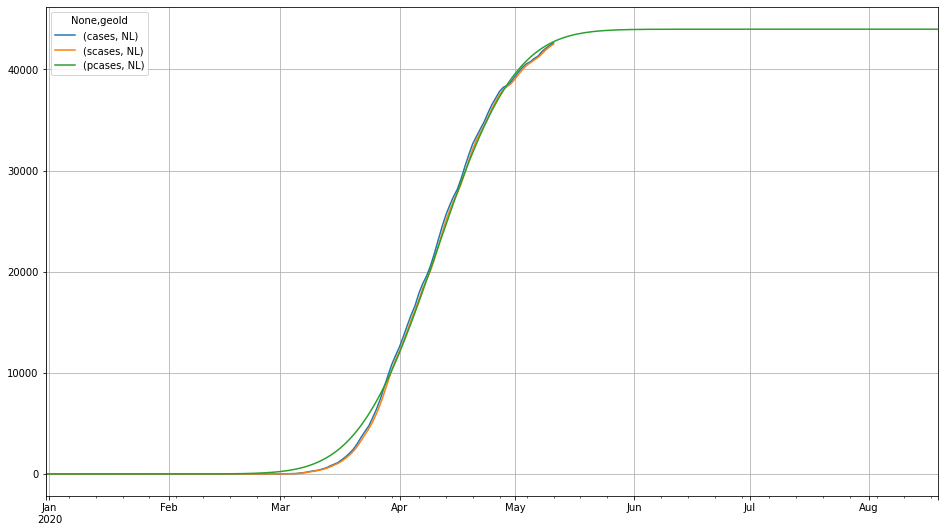

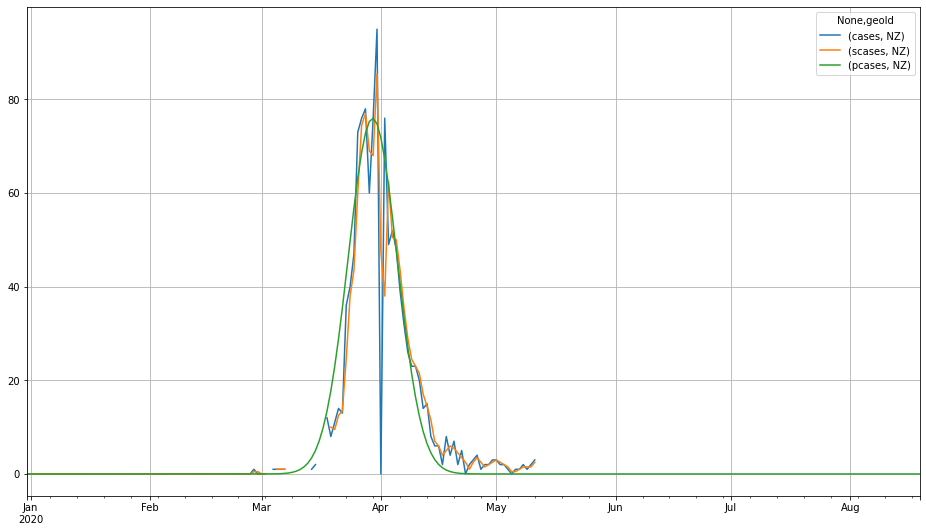

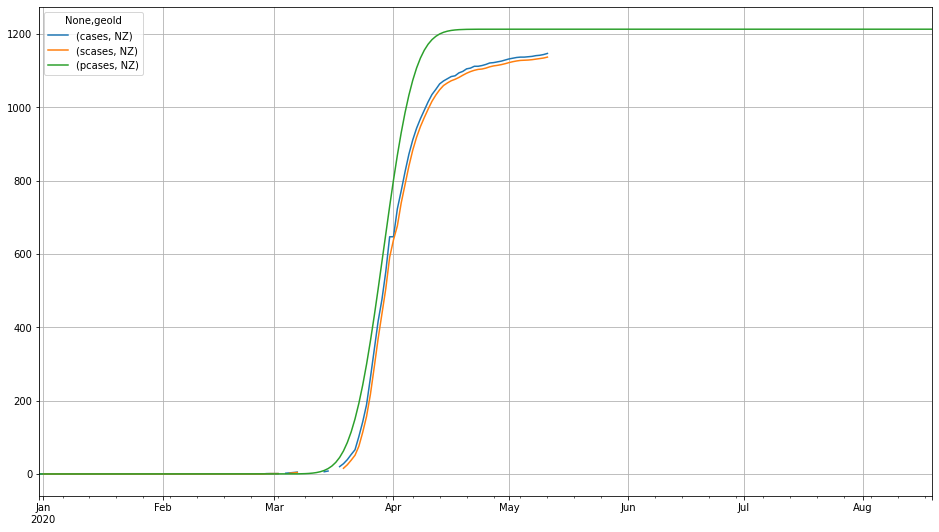

In [23]:
# countries = df['geoId'].unique()

countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'FR', 'SE', 'UK', 'IE', 'BE', 'NL', 'NZ']

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(2).mean()
    df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[smeasure][country]})
    df_pred = df_pred[df_pred['y'] > df[df['geoId'] == country]['popData2018'].iloc[0] / 1e5]
    df_pred['y'] = np.log10(df_pred['y'])
    if len(df_pred) > 7:
        fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
        df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
        print(country, "factors", fit[0], "residuals", fit[1][0])
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.